In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

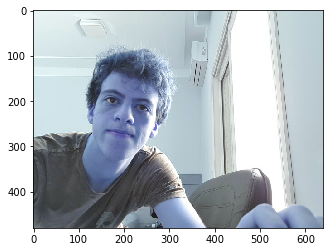

In [12]:
cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

while True:
    ret,frame=cap.read()
    face_rects = face_cascade.detectMultiScale(frame)
    plt.imshow(frame)
    if len(face_rects)>0:
        break

(face_x,face_y,w,h) = tuple(face_rects[0])
track_window=(face_x,face_y,w,h)

roi=frame[face_y:face_y+h,face_x:face_x+w]
hsv_roi=cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
roi_hist=cv2.calcHist([hsv_roi],[0],None,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

term_crit=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,1)

while True:
        ret,frame=cap.read()
        if ret == True:
            hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
            dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
            #################### MEANSHIFT
            #ret,track_window=cv2.meanShift(dst,track_window,term_crit)
            #x,y,w,h=track_window
            #img2=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
            #################### CAMSHIFT
            ret,track_window=cv2.CamShift(dst,track_window,term_crit)
            pts=cv2.boxPoints(ret)
            pts=np.int0(pts)
            img2=cv2.polylines(frame,[pts],True,(0,0,255),5)
            ####################
            cv2.imshow('img',img2)
            
            k=cv2.waitKey(30) & 0xFF
            if k==27:
                break
                
cv2.destroyAllWindows()
cap.release()
